# Housing Price Prediction

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data
data=pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

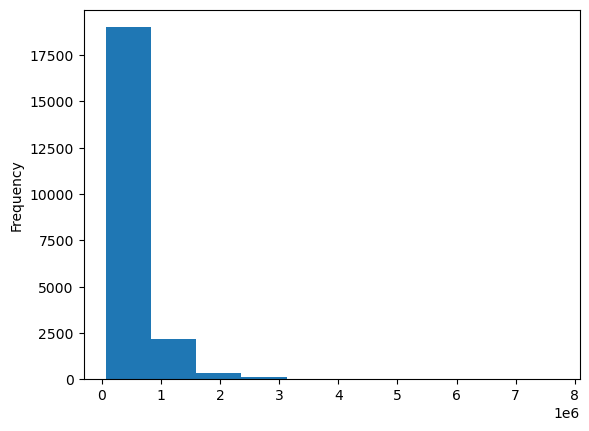

In [6]:
#distribution of the target variable
data['Sale Price'].plot.hist()

In [8]:
#checking quantiles
q1=data['Sale Price'].quantile(0.25)
q3=data['Sale Price'].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [9]:
#calculating iqr
iqr=q3-q1
iqr

323050.0

In [10]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
upperlimit, lowerlimit

(1129575.0, -162625.0)

In [11]:
#imputing outliers
def limit_imputer(value):
    if value>upperlimit:
        return upperlimit
    if value<lowerlimit:
        return lowerlimit
    else:
        return value

In [12]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

In [14]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

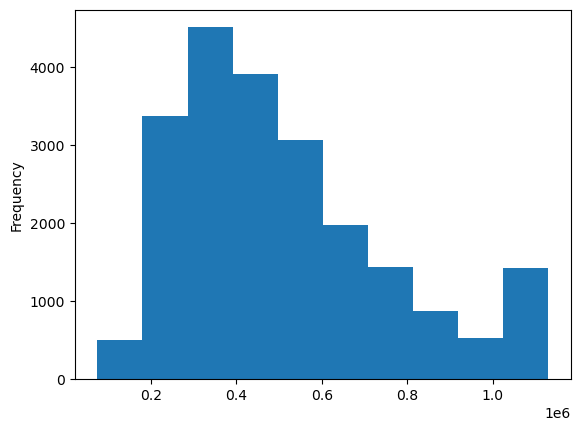

In [16]:
data['Sale Price'].plot.hist()

In [17]:
#checking missing values
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [28]:
data['Sale Price'].dropna(inplace=True)

In [29]:
data['Sale Price'].isnull().sum()

4

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [33]:
#isolating numerical variables
numerical_columns=['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)']

In [34]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

# Zipcode Transform

In [38]:
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [39]:
data['Zipcode'].shape

(21613,)

In [40]:
column = data['Zipcode'].values.reshape(-1,1)
data['Zipcode']=imputer.fit_transform(column)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

# Other Transformations

In [42]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [43]:
#converting from string to categorical numeric column
mapping = {'None':'0',
          'Once':'1',
           'Twice':'2',
           'Thrice':'3',
           'Four':'4'}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)

In [46]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [47]:
#new variable creation
data['Ever Renovated'] = np.where(data['Renovated Year']==0, 'No', 'Yes')

In [48]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [50]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [51]:
data['Years Since Renovation']=np.where(data['Ever Renovated']=='Yes', abs(data['Purchase Year']-data['Renovated Year']),0)

In [52]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [53]:
#dropping redundant variables
data.drop(columns=['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace=True)

In [54]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# Zipcode Bin

In [55]:
data.drop(columns='ID', inplace=True)

In [56]:
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [57]:
data['Condition of the House'].value_counts()

Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

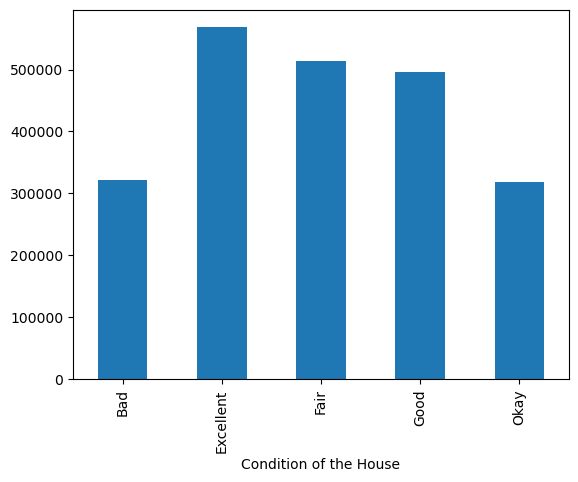

In [59]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Condition of the House'>

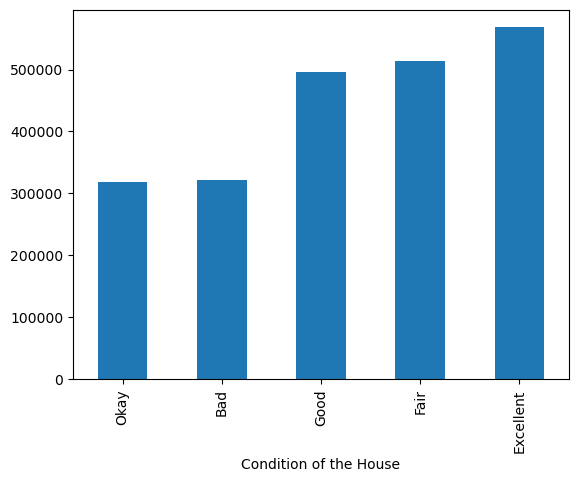

In [61]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Waterfront View'>

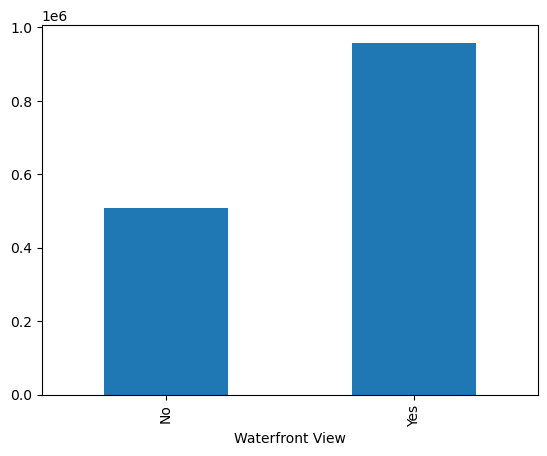

In [62]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Ever Renovated'>

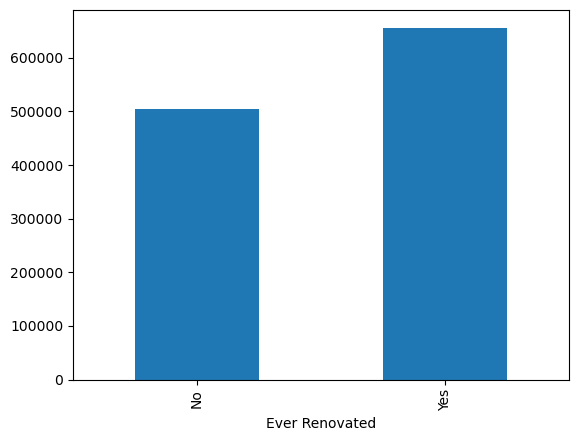

In [63]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Zipcode'>

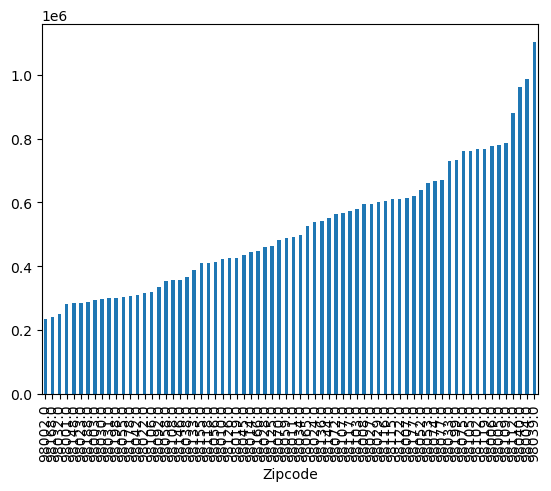

In [64]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

# Linear Regression

In [114]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

# Variable Transformation

In [115]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [116]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [117]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

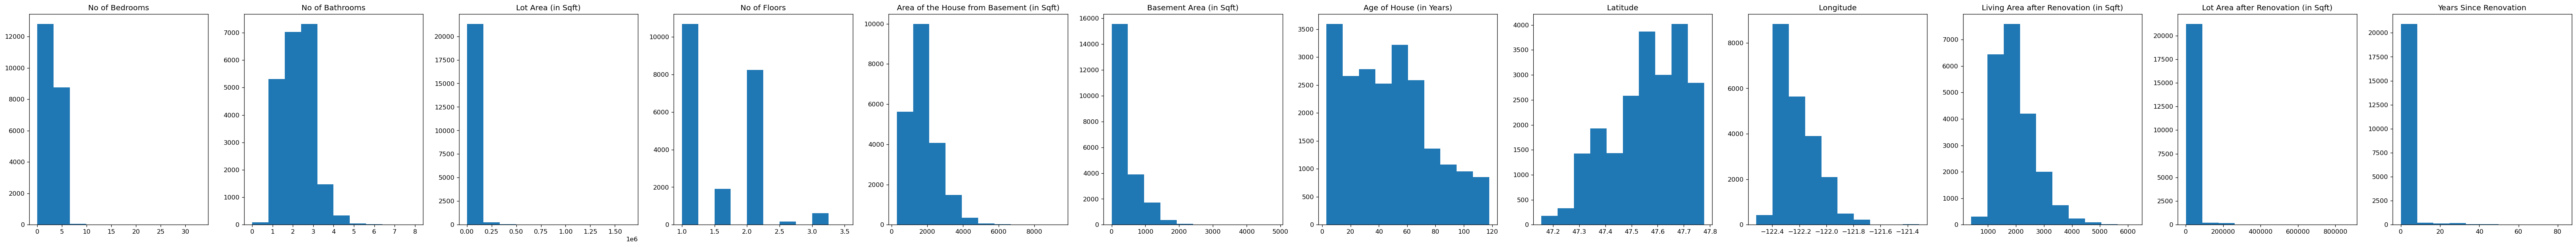

In [118]:
distribution(X, numerical_columns)

In [119]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [120]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

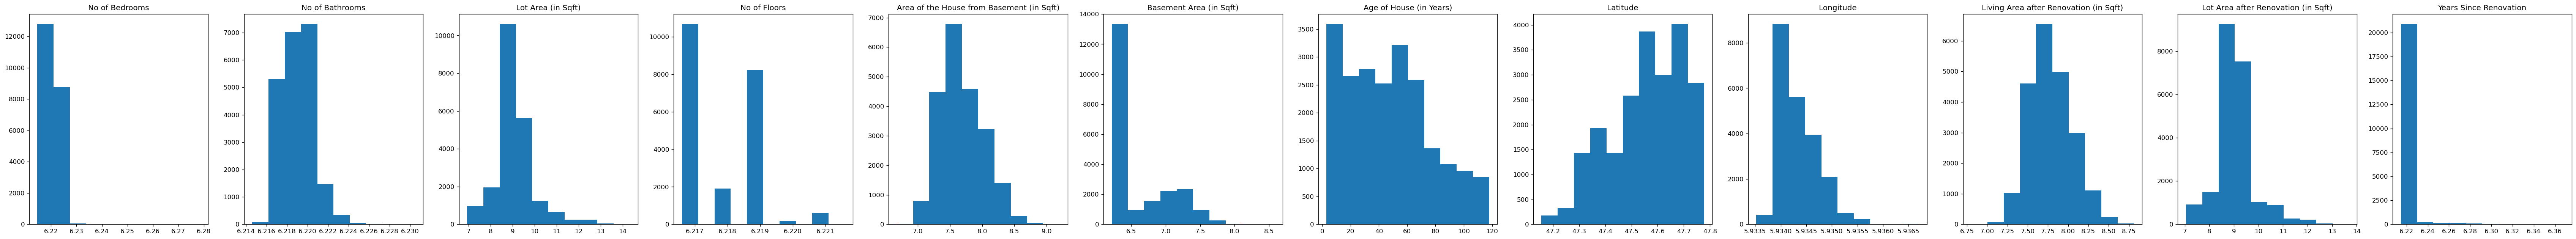

In [121]:
distribution(X, numerical_columns)

# Scaling the dataset

In [122]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,No,0,Fair,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,No,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,No,0,Fair,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,Yes,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,No,0,Fair,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,No,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,No,0,Excellent,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,No,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,No,0,Fair,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,No,6.214608


In [123]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,3,7,7.426549,6.214608,63,98178.0,47.5112,5.934214,7.517521,8.724207,0,6.214608
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,3,7,7.889834,6.802395,67,98125.0,47.7210,5.934050,7.691657,9.004423,1,6.265301
2,6.218600,6.216606,770.0,9.259131,6.216606,0,0,3,6,7.146772,6.214608,85,98028.0,47.7379,5.934278,8.077137,9.055089,0,6.214608
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,5,7,7.346010,7.251345,53,98136.0,47.5208,5.933854,7.528332,8.612503,0,6.214608
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,3,8,7.687080,6.214608,31,98074.0,47.6168,5.934775,7.740664,8.987572,0,6.214608


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.767588,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.642025,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-1.618851,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,-1.012639,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,0.025117,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


# Checking and Removing Multicollinearity

In [125]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.079649,0.028514,0.349933,0.509475,0.276781,-0.154613,-0.153163,-0.008867,0.129997,0.404806,0.154329,0.018555,-0.006734
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,0.187657,-0.124874,0.635778,0.696041,0.254042,-0.506206,-0.204097,0.024506,0.223332,0.572407,0.095798,0.050239,0.004644
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,0.284678,-0.058922,0.705725,0.853690,0.373296,-0.318146,-0.199380,0.052538,0.240124,0.739515,0.318573,0.055111,0.024552
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.121698,0.066113,0.165807,0.319715,0.056278,-0.006100,-0.279267,-0.145945,0.376102,0.361633,0.917835,0.022789,0.033036
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,0.029503,-0.263676,0.461442,0.548408,-0.266598,-0.489232,-0.059289,0.049640,0.125724,0.277817,-0.210687,0.006318,-0.000379
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.401856,0.016650,0.070332,0.063294,0.063276,0.026149,0.030286,-0.014275,-0.041934,0.080573,0.083232,0.093291,0.105822
No of Times Visited,0.079649,0.187657,0.284678,0.121698,0.029503,0.401856,1.000000,0.045978,0.223661,0.161106,0.249446,0.053395,0.084830,0.006162,-0.078472,0.268524,0.118788,0.104051,0.094621
Condition of the House,0.028514,-0.124874,-0.058922,0.066113,-0.263676,0.016650,0.045978,1.000000,-0.143747,-0.153588,0.176043,0.361383,0.003076,-0.015008,-0.106546,-0.090182,0.073370,-0.060152,-0.012115
Overall Grade,0.349933,0.635778,0.705725,0.165807,0.461442,0.070332,0.223661,-0.143747,1.000000,0.723789,0.116078,-0.456711,-0.185844,0.111226,0.201765,0.676795,0.167561,0.010010,-0.023473
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,0.161106,-0.153588,0.723789,1.000000,-0.111289,-0.448692,-0.285278,-0.015269,0.360187,0.720753,0.301163,0.026070,0.013457


In [126]:
#pair of independent variabes with correlation greater than 0.5
k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

# Calculating VIF

In [134]:
#importing Variance_Inflation_Factor function from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data=X[:]

#Calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.736931
No of Bathrooms                               3.424393
Flat Area (in Sqft)                          21.514533
Lot Area (in Sqft)                            6.844925
No of Floors                                  2.388708
Waterfront View                               1.211015
No of Times Visited                           1.415596
Condition of the House                        1.260549
Overall Grade                                 2.905865
Area of the House from Basement (in Sqft)    23.289239
Basement Area (in Sqft)                       6.561328
Age of House (in Years)                       2.458302
Zipcode                                       1.668833
Latitude                                      1.191495
Longitude                                     1.880317
Living Area after Renovation (in Sqft)        2.917259
Lot Area after Renovation (in Sqft)           6.603083
Ever Renovated                                3.022760
Years Sinc

In [136]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i)for i in range(data.shape[1])], index = data.columns)
    if vif.max() > 5:
        print(vif[vif==vif.max()].index[0], 'has been removed')
        data=data.drop(columns=[vif[vif==vif.max()].index[0]])
        return data
    else:
        print('No Multicollinearity present anymore')
        return data

In [137]:
for i in range(7):
    vif_data = MC_remover(vif_data)
    
vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-0.563993,-0.726332,0.544734,1.870094,-0.352576,-0.306108,-1.027547,-0.416515,-0.210155,-0.168911
1,-0.398647,0.176496,0.937193,-0.087181,-0.30579,-0.629203,-0.563993,0.538457,0.680915,0.879534,1.161645,-0.746519,-0.355983,-0.048331,4.758385,4.827106
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.30579,-0.629203,-1.468566,-0.726332,1.293731,-0.933379,1.283619,-0.135646,1.130637,0.018241,-0.210155,-0.168911
3,0.678352,1.149811,-0.915604,-0.087181,-0.30579,2.444136,-0.563993,1.504500,0.204281,1.085122,-0.283288,-1.272266,-0.985854,-0.563287,-0.210155,-0.168911
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.30579,-0.629203,0.340581,-0.726332,-0.544715,-0.073647,0.409587,1.199268,-0.166983,-0.070472,-0.210155,-0.168911


# Remaining Columns

In [139]:
#Calculating VIF for the remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.498157
 No of Bathrooms                           2.950107
 No of Floors                              2.185237
 Waterfront View                           1.209171
 No of Times Visited                       1.410593
 Condition of the House                    1.253804
 Overall Grade                             2.541427
 Basement Area (in Sqft)                   1.639834
 Age of House (in Years)                   2.392439
 Zipcode                                   1.666011
 Latitude                                  1.183389
 Longitude                                 1.857951
 Living Area after Renovation (in Sqft)    2.503466
 Lot Area after Renovation (in Sqft)       1.552630
 Ever Renovated                            3.017581
 Years Since Renovation                    2.868474
 dtype: float64,
 16)

In [140]:
X = vif_data[:]
#[:]: This is a slicing notation used with Python lists and DataFrames.
#returns a shallow copy of the entire DataFrame

# Train/Test set

In [141]:
Y=data['Sale Price']

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size = 0.3, random_state=101)

x_train.shape, x_test.shape,y_train.shape, y_test.shape

((15126, 16), (6483, 16), (15126,), (6483,))

# Training Model

In [145]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [146]:
lr.coef_

array([  1584.86669312,  42601.67421626,  23310.57525319,   9989.31321342,
        30480.01914579,  16059.91826464, 108934.75599668,  11330.36808308,
        65047.79835963, -15608.43858763,  75617.37499127,  -7749.57798632,
        54292.09103532,   2016.74778297,  16444.49611058, -11320.49390293])

In [147]:
predictions=lr.predict(x_test)

In [148]:
lr.score(x_test, y_test)

0.7344495220499552

# 1. Residuals

In [149]:
residuals = predictions - y_test

residual_table=pd.DataFrame({'residuals':residuals, 'predictions':predictions})
residual_table = residual_table.sort_values(by='predictions')

In [150]:
z=[i for i in range(int(residual_table['predictions'].max()))]
k=[0 for i in range(int(residual_table['predictions'].max()))]

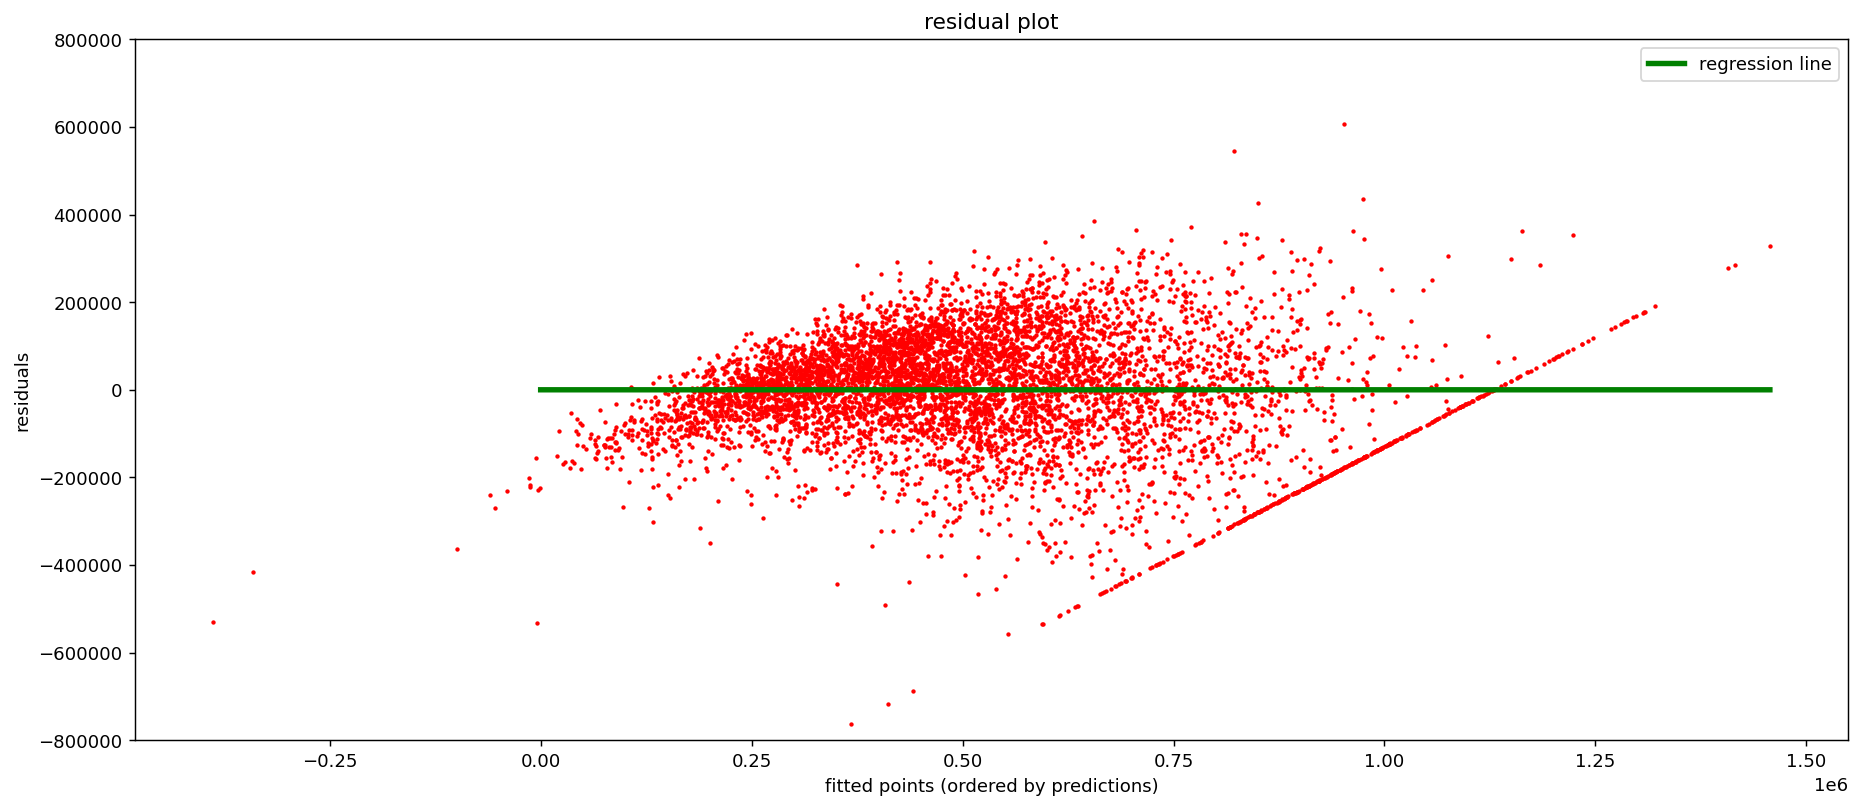

In [151]:
plt.figure(dpi=130, figsize=(17,7))

plt.scatter(residual_table['predictions'], residual_table['residuals'], color='red', s=2)
plt.plot(z,k,color='green', linewidth=3, label='regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# 2. Distribution of Errors

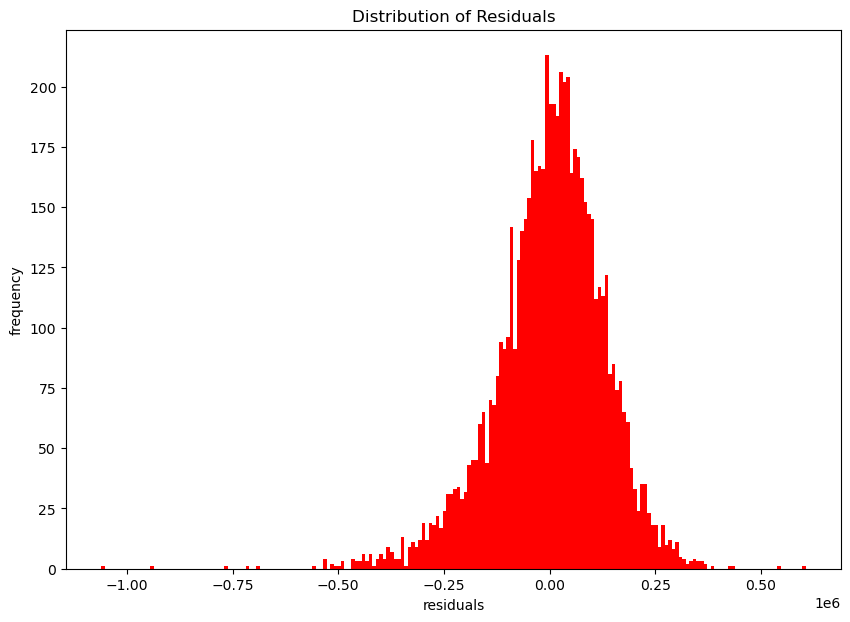

In [152]:
plt.figure(dpi=100, figsize=(10,7))
plt.hist(residual_table['residuals'], color='red', bins=200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('Distribution of Residuals')
plt.show()

# Model Coefficients

In [153]:
coefficients_table = pd.DataFrame({'column':x_train.columns, 'coefficients':lr.coef_})
coefficient_table=coefficients_table.sort_values(by = 'coefficients')

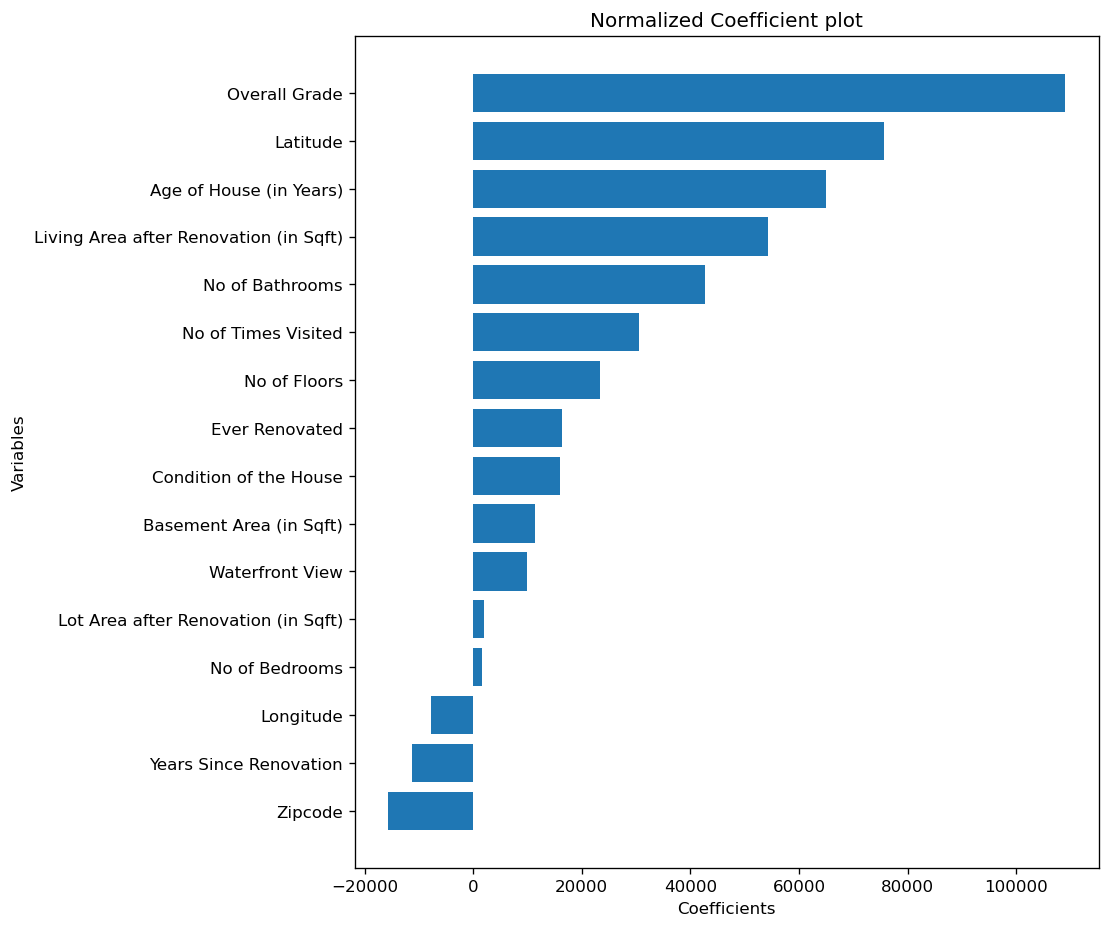

In [154]:
plt.figure(figsize=(8,9), dpi=120)
x=coefficient_table['column']
y=coefficient_table['coefficients']
plt.barh(x,y)
plt.xlabel('Coefficients')
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()